In [1]:
from numpy import ndarray
import numpy as np
from typing import List
from math import exp
import random

STUDENT_NAME = 'Юрий Сыровецкий'
STUDENT_NUMBER = 8
VARIANT = 2

CLASSES = {0: 'Iris-versicolor', 1: 'Iris-virginica'}
INPUT_SIZE = 4
HIDDEN_SIZE = 4
OUTPUT_SIZE = 1
LEARN_FACTORS = [0.05, 0.1, 0.25, 0.5, 0.75, 0.9]
EPOCHS = 300

class Perceptron:
    def __init__(self, learn_factor: float) -> None:
        self.learn_factor = learn_factor
        self.weights_hidden = [
            np.random.uniform(-1, 1, size=INPUT_SIZE)
            for _ in range(HIDDEN_SIZE)
        ]
        self.weights_output = np.random.uniform(-1, 1, size=HIDDEN_SIZE)
        self.err_sum: float = 0
        self.sample_count = 0

    @staticmethod
    def activate(x: float) -> float:
        return 1/(1 + exp(-x))

    def predict(self, input: ndarray) -> (ndarray, float):
        hidden = np.array([
            self.activate(np.dot(weights_hidden_j, input))
            for weights_hidden_j in self.weights_hidden
        ])
        output = self.activate(np.dot(self.weights_output, hidden))
        return hidden, output

    def learn(self, input: ndarray, target: float) -> None:
        hidden, output = self.predict(input)
        
        δ_output = output * (1 - output) * (target - output)
        Δweights_output = self.learn_factor * δ_output * hidden
        self.weights_output += Δweights_output
        
        δ_hidden = hidden * (1 - hidden) * δ_output * self.weights_output
        Δweights_hidden = np.array([
            self.learn_factor * δj * input for δj in δ_hidden
        ])
        self.weights_hidden += Δweights_hidden
        
        self.err_sum += (target - output) * (target - output)
        self.sample_count += 1

    def mean_square_error(self) -> float:
        return self.err_sum / 2 / self.sample_count

IRIS = [
    (np.array(list(map(float, fields[:4]))), 1 if fields[4] == 'Iris-virginica' else 0)
    for line in open('iris.data').readlines()
    for fields in [line.rstrip().split(',')]
    if len(fields) > 1
    if fields[4] in {'Iris-versicolor', 'Iris-virginica'}
]
    
def run(learn_factor: float) -> List[float]:
    perceptron = Perceptron(learn_factor)
    errors = []
    for _ in range(EPOCHS):
        input, target = random.choice(IRIS)
        perceptron.learn(input, target)
        errors.append(perceptron.mean_square_error())
    return errors

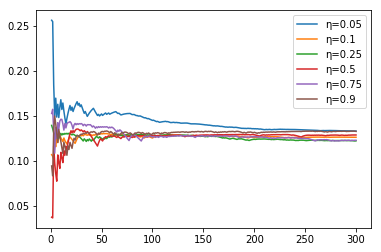

In [2]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt

results = {
    learn_factor: run(learn_factor)
    for learn_factor in LEARN_FACTORS
}

x = np.linspace(1, EPOCHS, EPOCHS)
for learn_factor, result in results.items():
    plt.plot(x, result, label='η={}'.format(learn_factor))
plt.legend()
plt.show()